In [1]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import h5py
import tensorflow as tf

drive.mount('/content/drive')

#load the dataset
with h5py.File('/content/drive/My Drive/train.h5', 'r') as train_data:
    original_train_set_x = np.array(train_data['train_set_x'])
    original_train_set_y = np.array(train_data['train_set_y'])


Mounted at /content/drive


In [2]:
#define new training and test datasets
last_digit = 1 #the last digit of my student ID is 1
train_size = 160 + last_digit  #161 images for the new training set

train_set_x = original_train_set_x[:train_size] #define new training images
train_set_y = original_train_set_y[:train_size] #define new training labels

test_set_x = original_train_set_x[train_size:] #define new test images
test_set_y = original_train_set_y[train_size:] #define new test labels

#flatten and normalize images
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], -1).T / 255.
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T / 255.


Indices of incorrect predictions: [ 1  2  3  6  8  9 10 12 14 16 18 22 24 27 31 34 35 36 39 41 43]
Training Accuracy: 91.30434782608695%
Test Accuracy: 56.25%


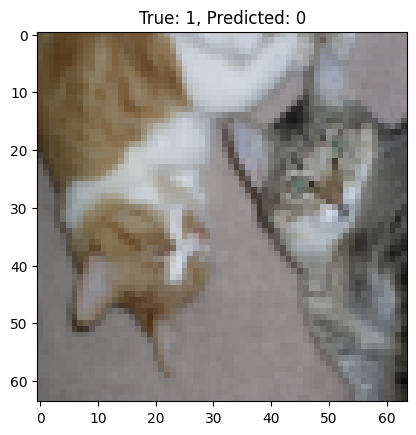

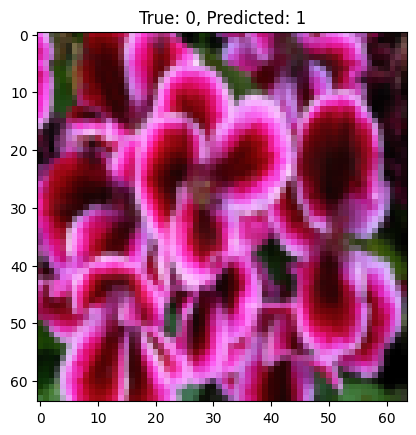

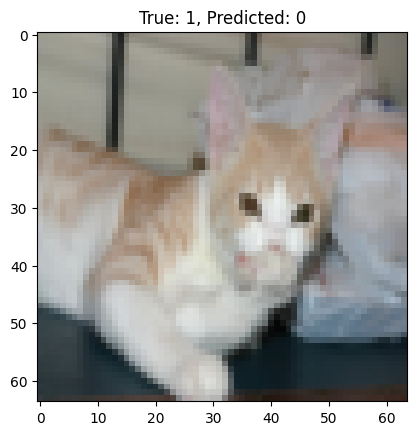

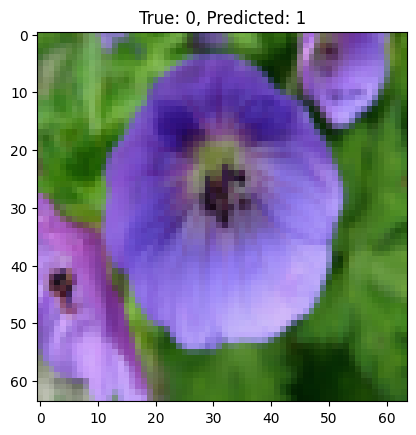

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#sigmoid function: the sigmoid of z is used to convert linear predictions into probabilities
def sigmoid(z):  #define sigmoid function
    return 1 / (1 + np.exp(-z))

#define cost function
def comp_cost(theta, X, y):
    m = X.shape[0] #num samples
    h = sigmoid(np.dot(theta.T, X)) #predicted probabilities
    cost = (1/m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)) #cross-entropy loss
    return cost

#define gradient computation
def comp_gradient(theta, X, y):
    m = X.shape[0] #num samples
    h = sigmoid(np.dot(theta.T, X)) #predicted probabilities
    gradient = (1 / m) * np.dot(X, (h - y).T) #gradient calculation
    return gradient

#gradient descent for logistic regression
def gradient_descent(X, y, theta, learn_rate=0.05, num_iter=2000):
    cost = [] #initialize list to store cost at each iteration
    for i in range(num_iter):
        gradient = comp_gradient(theta, X, y) #compute gradient
        theta = theta - learn_rate * gradient #update parameters
        cost.append(comp_cost(theta, X, y))
    return theta, cost



theta_0 = np.zeros((train_set_x_flatten.shape[0], 1))  #initialize weights to 0
y_train_binary = (train_set_y == 1).astype(int)  #convert training labels to binary
y_test_binary = (test_set_y == 1).astype(int)  #convert test labels to binary

#train the logistic regression model
theta_optimal, _ = gradient_descent(train_set_x_flatten, y_train_binary, theta_0)

#make predictions on the train and test set
y_train_predictions = sigmoid(np.dot(theta_optimal.T, train_set_x_flatten)) >= 0.5
y_test_predictions = sigmoid(np.dot(theta_optimal.T, test_set_x_flatten)) >= 0.5

#identify incorrect predictions
incorrect_indices = np.where(y_test_predictions.flatten() != test_set_y.flatten())[0]
print("Indices of incorrect predictions:", incorrect_indices)

train_accuracy = 100 - np.mean(np.abs(y_train_predictions - train_set_y)) * 100
test_accuracy = 100 - np.mean(np.abs(y_test_predictions - test_set_y)) * 100

print(f"Training Accuracy: {train_accuracy}%") #printing the accuracy
print(f"Test Accuracy: {test_accuracy}%")


#display incorrect predictions
for i in range(min(4, len(incorrect_indices))):  #display up to 4 incorrect predictions
    idx = incorrect_indices[i]
    plt.imshow(test_set_x[idx])
    plt.title(f"True: {test_set_y[idx]}, Predicted: {int(y_test_predictions.flatten()[idx])}")
    plt.show()
